In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
music_df = pd.read_csv("music_clean.csv")
music_df.drop(music_df.filter(regex="Unname"),axis=1, inplace=True)

In [3]:
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [4]:
music_df.isna().sum().sort_values()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

In [14]:
samples = music_df.drop("genre",axis=1).values
variety_numbers = music_df["genre"].values

In [27]:
##from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
samples_normalized = StandardScaler().fit_transform(samples)

In [15]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

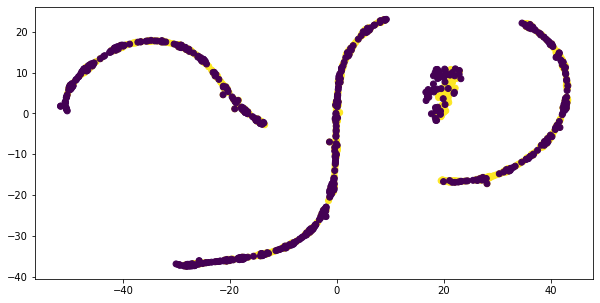

In [19]:
# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(10,5))
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

In [28]:
# Create a TSNE instance: model
model_norm = TSNE(learning_rate=50)

# Apply fit_transform to samples: tsne_features
tsne_features_norm = model_norm.fit_transform(samples_normalized)

# Select the 0th feature: xs
xs_n = tsne_features_norm[:,0]

# Select the 1st feature: ys
ys_n = tsne_features_norm[:,1]

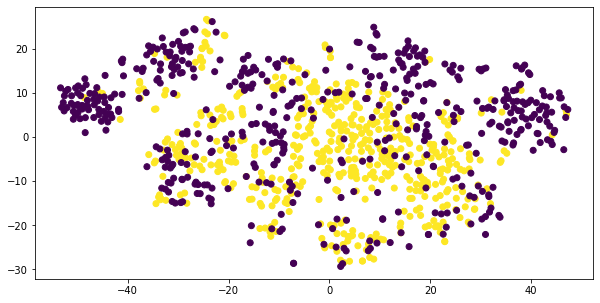

In [29]:
# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(10,5))
plt.scatter(xs_n,ys_n,c=variety_numbers)
plt.show()